# LSTM RNN to Predict Visa Stock Prices


data exploration

In [ ]:
import pandas as pd

# Load the uploaded dataset to inspect its structure
file_path = 'visa_stocks.csv'
visa_stocks_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
visa_stocks_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-03-19,14.875000,17.250000,13.7500,14.1250,12.579995,708486000
1,2008-03-20,14.600000,16.250000,14.3750,16.0875,14.327834,198985200
2,2008-03-24,16.809999,16.924999,14.7500,14.9325,13.299167,149566400
3,2008-03-25,15.145000,16.062500,14.9550,15.8125,14.082910,87092000
4,2008-03-26,15.682500,16.120001,15.3925,15.9900,14.240999,43111600


convert date values from string to datetime and make it the index for the dataset

In [ ]:
visa_stocks_data['Date'] = pd.to_datetime(visa_stocks_data['Date'])
visa_stocks_data.set_index('Date', inplace=True)
print(visa_stocks_data.index)

DatetimeIndex(['2008-03-19', '2008-03-20', '2008-03-24', '2008-03-25',
               '2008-03-26', '2008-03-27', '2008-03-28', '2008-03-31',
               '2008-04-01', '2008-04-02',
               ...
               '2024-10-08', '2024-10-09', '2024-10-10', '2024-10-11',
               '2024-10-14', '2024-10-15', '2024-10-16', '2024-10-17',
               '2024-10-18', '2024-10-21'],
              dtype='datetime64[ns]', name='Date', length=4177, freq=None)


# Preprocessing data for a time-series analysis and feature engineering

1) **Load the Dataset:**

Reads the original dataset from a CSV file (visa_stocks_data_original) and records the number of rows (original_row_count).

2) **Inspect the Dataset:**

Displays the number of rows and the first few rows of the dataset for an initial inspection to understand its size and structure.

3) **Create a Copy:**

Creates a copy of the dataset (visa_stocks_data) to avoid modifying the original data directly.

4) **Date Conversion and Feature Extraction:**

Converts the 'Date' column to a datetime format for easier manipulation.
Extracts features such as:
Month: The month of each date.
Day: The day of each date.
Quarter: The fiscal quarter of each date.

5) **Add New Features:**

Calculates new columns for deeper insights:
price_range: The difference between the daily high and low prices.
close_to_open_diff: The difference between the close and open prices for each day.
volume_pct_change: The percentage change in trading volume compared to the previous day.

6) **Calculate Moving Averages and Volatility:**

Adds rolling computations to capture trends and fluctuations:
7_day_ma: The 7-day moving average of the adjusted close price.
14_day_ma: The 14-day moving average of the adjusted close price.
7_day_volatility: The standard deviation of the adjusted close price over the last 7 days (a measure of short-term volatility).
14_day_volatility: The standard deviation over the last 14 days (a measure of medium-term volatility).

7) **Record Processed Row Count:**

Records the number of rows in the processed dataset (processed_row_count).

8) **Set 'Date' as the Index:**

Sets the 'Date' column as the index of the dataset to enable time-series analysis and easier plotting.

9) **Final Verification:**

Displays the first few rows of the processed dataset and the total row count after processing for validation.

In [ ]:
# Reload the original dataset to inspect its size and structure before applying rolling computations
visa_stocks_data_original = pd.read_csv(file_path)
original_row_count = len(visa_stocks_data_original)

# Display the shape and first few rows of the original dataset
original_row_count, visa_stocks_data_original.head()
visa_stocks_data = visa_stocks_data_original.copy()

# Convert 'Date' to datetime and extract date-related features
visa_stocks_data['Date'] = pd.to_datetime(visa_stocks_data['Date'])
visa_stocks_data['Month'] = visa_stocks_data['Date'].dt.month
visa_stocks_data['Day'] = visa_stocks_data['Date'].dt.day
visa_stocks_data['Quarter'] = visa_stocks_data['Date'].dt.quarter

# Add new features
visa_stocks_data['price_range'] = visa_stocks_data['High'] - visa_stocks_data['Low']
visa_stocks_data['close_to_open_diff'] = visa_stocks_data['Close'] - visa_stocks_data['Open']
visa_stocks_data['volume_pct_change'] = visa_stocks_data['Volume'].pct_change()

# Calculate moving averages and volatility with minimal data loss
visa_stocks_data['7_day_ma'] = visa_stocks_data['Adj Close'].rolling(window=7, min_periods=1).mean()
visa_stocks_data['14_day_ma'] = visa_stocks_data['Adj Close'].rolling(window=14, min_periods=1).mean()
visa_stocks_data['7_day_volatility'] = visa_stocks_data['Adj Close'].rolling(window=7, min_periods=1).std()
visa_stocks_data['14_day_volatility'] = visa_stocks_data['Adj Close'].rolling(window=14, min_periods=1).std()

# Avoid premature dropping of NaN values
processed_row_count = len(visa_stocks_data)

visa_stocks_data.index = visa_stocks_data.pop('Date')
# Display the processed dataset and row count
visa_stocks_data.head(), processed_row_count

(                 Open       High      Low    Close  Adj Close     Volume  \
 Date                                                                       
 2008-03-19  14.875000  17.250000  13.7500  14.1250  12.579995  708486000   
 2008-03-20  14.600000  16.250000  14.3750  16.0875  14.327834  198985200   
 2008-03-24  16.809999  16.924999  14.7500  14.9325  13.299167  149566400   
 2008-03-25  15.145000  16.062500  14.9550  15.8125  14.082910   87092000   
 2008-03-26  15.682500  16.120001  15.3925  15.9900  14.240999   43111600   
 
             Month  Day  Quarter  price_range  close_to_open_diff  \
 Date                                                               
 2008-03-19      3   19        1     3.500000           -0.750000   
 2008-03-20      3   20        1     1.875000            1.487499   
 2008-03-24      3   24        1     2.174999           -1.877500   
 2008-03-25      3   25        1     1.107500            0.667500   
 2008-03-26      3   26        1     0.727501

# Further data exploration

# Key Observations:
**Upward Trend:**

The graph shows a consistent upward trend from 2008 to 2024, indicating that Visa's stock has significantly appreciated in value over this period.
This suggests strong business growth and investor confidence over the years.

**Exponential Growth:**

The rate of increase appears to accelerate over time, especially after 2016. This could reflect factors such as increased market share, expansion into digital payments, and strong financial performance.

**Volatility:**

Some periods, particularly after 2020, show increased fluctuations in the stock price. This could be attributed to market uncertainty, economic disruptions like the COVID-19 pandemic, or other macroeconomic factors affecting the financial sector.

**Stable Recovery:**

Despite the volatility, the stock consistently rebounded, demonstrating resilience and continued investor confidence.

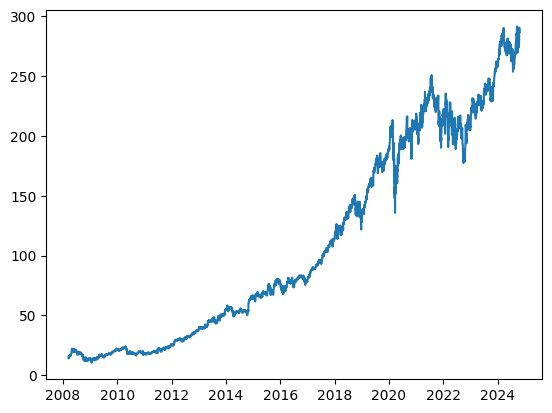

In [ ]:
import matplotlib.pyplot as plt

plt.plot(visa_stocks_data.index, visa_stocks_data['Close'])

# Observations:
**Open, High, Low, Close, and Adjusted Close:**

These histograms exhibit a positively skewed distribution. Most stock prices are concentrated at lower values, with a smaller number of data points at higher values.
This reflects Visa's long-term stock price growth, where earlier prices were significantly lower compared to recent years.

**Volume:**

The volume of traded stocks shows a strong positive skew, with most data points clustered at lower trading volumes.
A few instances of significantly higher trading volumes (outliers) are visible, potentially corresponding to events like earnings announcements or major market disruptions.

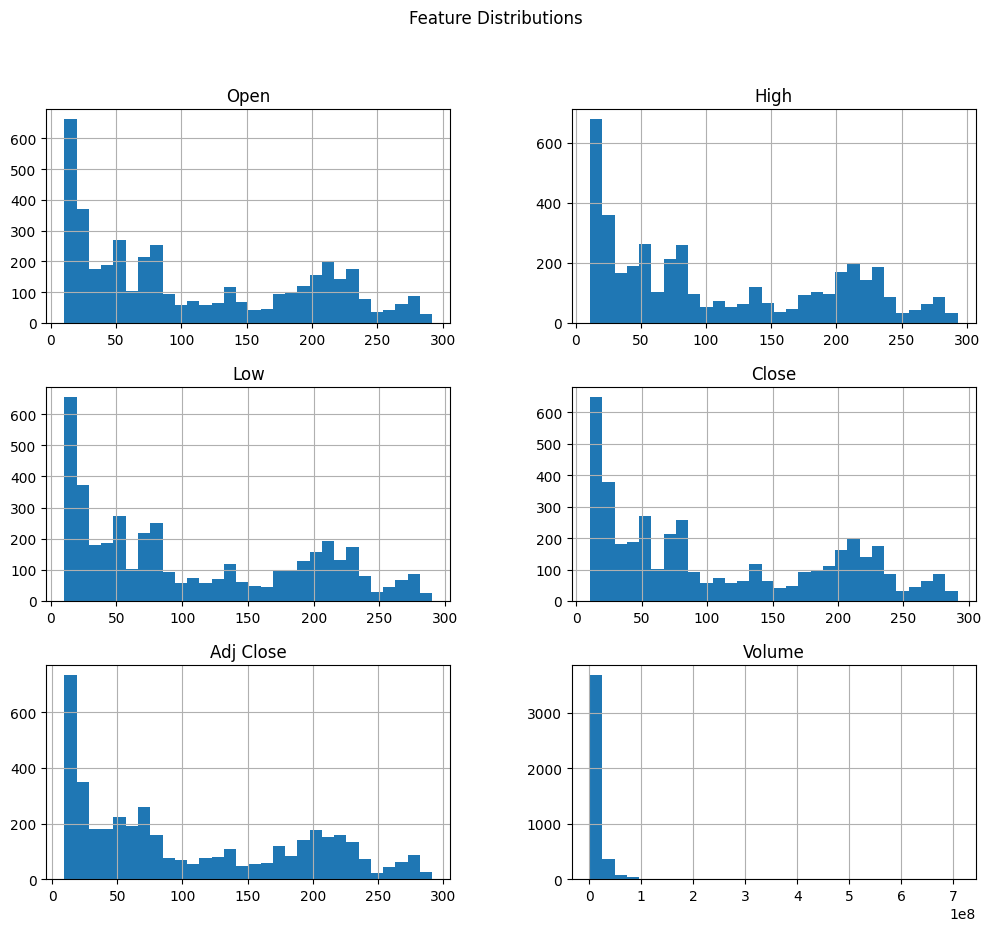

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

# Visualize the distribution of numerical columns
visa_stocks_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].hist(bins=30, figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()


# Insights:
**Stock Price Growth:**

The skewed distributions of the price-related features (Open, High, Low, Close, and Adj Close) align with the line chart from the previous image, showing consistent growth over time.
Earlier prices dominate the distribution, while higher prices represent the more recent period.

**Volume Trends:**

The low trading volume in most instances suggests steady trading activity for Visa stocks over time.
Outliers in trading volume could indicate specific periods of high market activity due to external events or company news.

# Correlation Matrix

# Observations:

**High Correlation Among Price Features:**

Open, High, Low, Close, and Adj Close have nearly perfect positive correlations (close to 1.0).
This is expected because these values are interrelated in stock data. For example, the High price for the day often depends on the Open price.

**price_range Correlation:**

price_range (difference between High and Low) has a strong positive correlation (around 0.7) with all price-related features, as it directly depends on them.
It also has a notable correlation with 7_day_volatility and 14_day_volatility, indicating that larger price ranges often coincide with higher price volatility.

**Low Correlation with Temporal Features:**

Features like Month, Day, and Quarter show little to no correlation with stock prices or other features, as expected. These are primarily categorical or cyclical features.

**Volatility Metrics:**

7_day_volatility and 14_day_volatility are moderately correlated with price-related features (around 0.66–0.76).
These metrics measure fluctuations, which tend to align with higher price ranges or trends.

**volume_pct_change Correlation:**

volume_pct_change has low correlation with most features, including price-related ones. This suggests that changes in trading volume do not strongly drive price fluctuations in this dataset.

**Moving Averages:**

7_day_ma and 14_day_ma are highly correlated with price features, as they are derived directly from Adj Close.
They also have high inter-correlation, as the 14-day moving average naturally smooths trends over a longer period.


Correlation Matrix:
                         Open      High       Low     Close  Adj Close  \
Open                1.000000  0.999913  0.999897  0.999812   0.999639   
High                0.999913  1.000000  0.999860  0.999901   0.999719   
Low                 0.999897  0.999860  1.000000  0.999910   0.999752   
Close               0.999812  0.999901  0.999910  1.000000   0.999832   
Adj Close           0.999639  0.999719  0.999752  0.999832   1.000000   
Volume             -0.361148 -0.359769 -0.362699 -0.361452  -0.357483   
Month              -0.007114 -0.007805 -0.006812 -0.007353  -0.007133   
Day                -0.001664 -0.001573 -0.001779 -0.002001  -0.001972   
Quarter            -0.006531 -0.007207 -0.006171 -0.006675  -0.006525   
price_range         0.709539  0.714809  0.703001  0.708498   0.707356   
close_to_open_diff -0.004485  0.004606  0.005879  0.014930   0.015122   
volume_pct_change  -0.018871 -0.018021 -0.021048 -0.020107  -0.019893   
7_day_ma            0.999432 

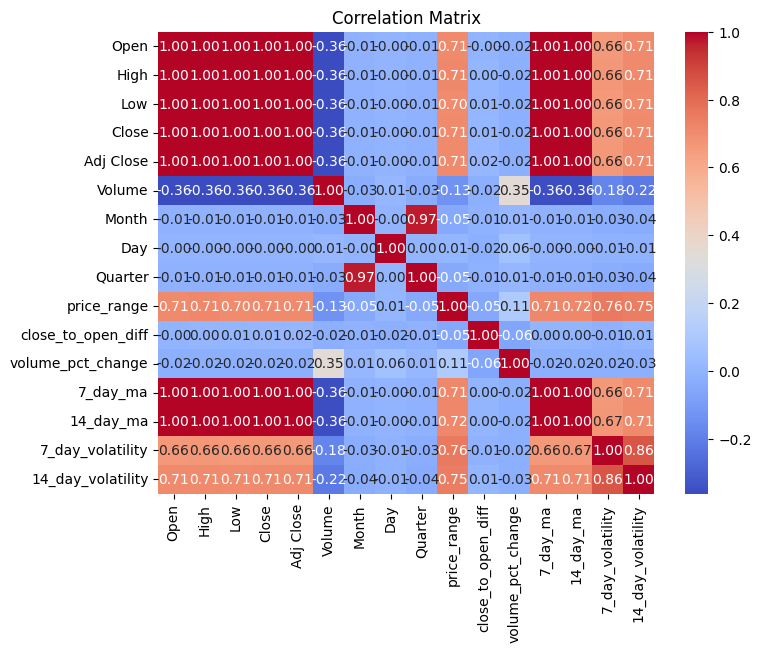

In [ ]:
# Correlation matrix
correlation_matrix = visa_stocks_data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Insights:
**Feature Selection:**

Features like Month, Day, and Quarter might not be useful for predictive modeling due to their low correlations with price and volume features.
price_range and volatility metrics could be valuable for capturing short-term trends or risk.

**Redundancy:**

Features like Open, High, Low, Close, and Adj Close are highly redundant. For modeling, you might choose one (e.g., Adj Close) to reduce dimensionality.

**Trend Analysis:**

The high correlation between moving averages and price features suggests that these can help capture trends over time.

# Preparing dataset for supervised learning by scaling features, creating a time-series structure with a lookback period and splitting the data into training and testing sets

This code prepares data for time-series prediction, where historical sequences of stock data are used to predict future prices.
It is designed for models like Long Short-Term Memory (LSTM) networks or other RNN-based models, which require sequential data inputs.


1) **Define Features and Target:**
The features list includes 16 predictors like stock prices, moving averages, volatility, and time-based variables (Month, Day, Quarter).
The target is the 'Adj Close' column, representing the adjusted closing price, which will be predicted.

2) **Handle Missing Values:**
Drops rows with missing values in any of the selected features using dropna() to ensure a clean dataset for machine learning.

3) **Scale the Features:**
Uses MinMaxScaler from sklearn to scale all feature values to the range [0, 1].
Scaling ensures that all features contribute equally to the model and prevents features with larger ranges from dominating.

4) **Prepare Time-Series Data:**
A lookback period of 60 days is used, meaning the model uses the past 60 days of data to predict the adjusted closing price for the next day.
Constructs X (features) as sequences of 60 days' data for all features.
Constructs y (target) as the adjusted closing price on the day following the 60-day sequence.
Uses a loop to iterate through the scaled data and build the input (X) and output (y) arrays.

5) **Convert to NumPy Arrays:**
Converts X and y into NumPy arrays for compatibility with machine learning models.

6) **Split into Training and Testing Sets:**
Splits the data into 80% training and 20% testing using train_test_split from sklearn.
random_state=42 ensures reproducibility of the split.

7) **Check Data Shapes:**
Prints the shapes of X_train, X_test, y_train, and y_test to confirm that the data is structured correctly:
X_train and X_test will have shapes like (samples, 60, 16), where 60 is the lookback period and 16 is the number of features.
y_train and y_test will have shapes like (samples,).

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Define features and target
features = [
    'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
    'price_range', 'close_to_open_diff', 'volume_pct_change',
    '7_day_ma', '14_day_ma', '7_day_volatility', '14_day_volatility',
    'Month', 'Day', 'Quarter'
]
target = 'Adj Close'

# Ensure no missing values
visa_stocks_data = visa_stocks_data.dropna(subset=features)

# Scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(visa_stocks_data[features])

# Prepare supervised learning data
lookback = 60
X, y = [], []
for i in range(lookback, len(scaled_data)):
    X.append(scaled_data[i - lookback:i, :])  # Use all 16 features
    y.append(scaled_data[i, features.index(target)])  # Target value (Adj Close)

X, y = np.array(X), np.array(y)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (3292, 60, 16)
Testing data shape: (824, 60, 16)


# Training the model


**Sequential Model:**
Built using TensorFlow/Keras Sequential API.

**First LSTM Layer:**
128 units with return_sequences=True because this is followed by another LSTM layer.
input_shape=(60, 16), where 60 is the lookback period, and 16 is the number of features.

**Dropout Layer:**
Adds a 20% dropout rate to prevent overfitting.

**Second LSTM Layer:**
128 units with return_sequences=False because this is the final LSTM layer.

**Dropout Layer:**
Another 20% dropout for regularization.

**Dense Layer:**
25 neurons with ReLU activation to capture complex patterns in the data.

**Output Layer:**
Single neuron for the predicted adjusted closing price.

**Optimizer:**
Adam, which adapts learning rates for faster convergence.

**Loss Function:**
Mean Squared Error (MSE), appropriate for regression tasks.

**Define Early Stopping:**
Monitors validation loss to prevent overfitting.
Stops training if validation loss doesn’t improve after 10 epochs (patience=10).
Restores the best weights when stopping occurs (restore_best_weights=True).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 216ms/step - loss: 0.0205 - val_loss: 0.0021
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 23s 223ms/step - loss: 0.0018 - val_loss: 4.8830e-04
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 40s 211ms/step - loss: 0.0012 - val_loss: 7.3903e-04
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 45s 251ms/step - loss: 9.8846e-04 - val_loss: 2.4732e-04
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 40s 238ms/step - loss: 0.0011 - val_loss: 3.9675e-04
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 38s 215ms/step - loss: 9.8076e-04 - val_loss: 7.3378e-04
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 42s 229ms/step - loss: 9.0656e-04 - val_loss: 5.7508e-04
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 40s 222ms/step - loss: 8.3344e-04 - val_loss: 2.3900e-04
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - loss: 0.0012 - val_loss: 2.1065e-04
Epoch 10/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - loss: 7.3467e-04 - val_loss: 2.0684e-04
Epoch 11/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/st

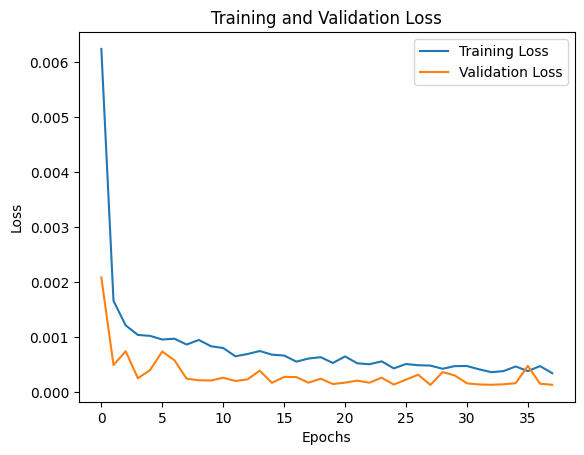

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # Single output for the predicted price
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Stop training if no improvement after 10 epochs
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Save the trained model
model.save("lstm_visa_model_16_features.h5")

# Observations:

**Steep Initial Decrease:**

Both training and validation loss decrease sharply during the first few epochs, indicating that the model is learning patterns in the data quickly.

**Convergence:**

After around 10-15 epochs, the training and validation losses stabilize at low values, which suggests the model has reached an optimal level of performance without significant overfitting or underfitting.

**Validation Loss Trend:**

The validation loss fluctuates slightly but remains relatively low and consistent with the training loss.
This indicates that the model generalizes well to unseen data (validation set).

**No Overfitting:**

If the validation loss were to increase while the training loss continued to decrease, it would indicate overfitting. This is not evident in your graph.


# Function Prepare Future Data to generate input features for predicting a future stock price


**Inputs:**

1) user_date:
The target date (e.g., "2024-12-31") for which the prediction is to be made.

2) visa_stocks_data:
The dataset containing recent stock data (historical).

3) lookback:
The number of days of past data used for prediction (e.g., 60 days).

4) scaler:
A pre-trained MinMaxScaler object used to normalize the features.

5) feature_order:
A list of features to ensure the columns are in the correct order for the model.

**Steps:**

1) Convert user_date to Datetime:
Parses the input user_date string into a datetime object to extract the month, day, and quarter.
Example:
If user_date is "2024-12-31":
month = 12, day = 31, quarter = 4.

2) Extract Recent Data:
Selects the last lookback rows (e.g., the last 60 days) from visa_stocks_data.
These rows are used as the basis for extrapolating features for the future date.

3) Add Future Date Features:
Modifies the selected data by setting the Month, Day, and Quarter columns to the values of the future user_date.

4) Reorder Columns:
Ensures the columns in recent_data match the feature_order expected by the model.

5) Scale the Data:
Normalizes the data using the provided scaler to match the format used during model training.
The scaled data is reshaped into a 3D array: (1, lookback, num_features), which is the input shape expected by LSTM models.

In [ ]:
import numpy as np
from datetime import datetime

# Function to extrapolate features for a future date
def prepare_future_data(user_date, visa_stocks_data, lookback, scaler, feature_order):
    """
    Prepare feature values for a future date based on recent trends.
    """


    # Convert user_date to datetime and extract features
    user_date = datetime.strptime(user_date, "%Y-%m-%d")
    month, day, quarter = user_date.month, user_date.day, (user_date.month - 1) // 3 + 1

    # Use the last 'lookback' days of data to create input for prediction
    recent_data = visa_stocks_data[-lookback:].copy()

    # Calculate new features for the future date based on recent trends
    recent_data['Month'] = month
    recent_data['Day'] = day
    recent_data['Quarter'] = quarter

    recent_data = recent_data.reindex(columns=feature_order)


    # Scale the data
    scaled_data = scaler.transform(recent_data)
    return np.array([scaled_data])  # Shape: (1, lookback, num_features)

    # Save the trained model

model.save("lstm_visa_model_16_features.h5")




# Load Trained LSTM model to predict the adjusted closing price for a specific future date

1) **Load the Pre-Trained Model:**
The LSTM model previously trained and saved as lstm_visa_model_16_features.h5 is loaded using load_model.

2) **Feature Order Setup:**
Ensures the columns used during training are in the correct order before preparing data for prediction.
The feature_order list defines the exact sequence of features required for scaling and prediction.

3) **Prepare the Future Data:**
Calls the prepare_future_data function (defined earlier) to generate a 3D array of input features for the specified future date (user_date):
visa_stocks_data: Recent historical stock data.
lookback=60: Uses the last 60 days to predict the stock price.
scaler: The pre-trained scaler for normalizing features.
feature_order: Ensures feature columns are aligned correctly.

4) **Make Predictions:**
Feeds the prepared future data (X_future) into the loaded LSTM model to generate a scaled prediction.
The output is a normalized value for the adjusted closing price.

5) **Inverse Transformation:**
The prediction is rescaled back to its original scale:
A dummy_row is created with zeros, except for the predicted value of 'Adj Close'.
The scaler.inverse_transform method is used to convert the scaled data back to the original price range.

6) **Output the Prediction:**
Prints the rescaled predicted adjusted closing price for the specified future date.

In [ ]:
# Load the trained model (ensure you saved it earlier as "lstm_visa_model.h5")
from tensorflow.keras.models import load_model

model = load_model("lstm_visa_model_16_features.h5")




# Input the desired date for prediction
user_date = "2025-01-05"
feature_order = [
    'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
    'price_range', 'close_to_open_diff', 'volume_pct_change',
    '7_day_ma', '14_day_ma', '7_day_volatility', '14_day_volatility',
    'Month', 'Day', 'Quarter'
]
# Prepare the data for the future date
X_future = prepare_future_data(
    user_date=user_date,
    visa_stocks_data=visa_stocks_data,
    lookback=60,
    scaler=scaler,
    feature_order=feature_order  # Pass the saved feature order
)

# Make predictions
scaled_prediction = model.predict(X_future)

# Correct the length of dummy_row to match the features
dummy_row = [0] * len(features)  # Create a dummy row with 16 elements
dummy_row[features.index('Adj Close')] = scaled_prediction[0, 0]  # Set the predicted value for 'Adj Close'

# Perform the inverse transformation
predicted_price = scaler.inverse_transform([dummy_row])[0][features.index('Adj Close')]

# Output the predicted price
print(f"Predicted Adjusted Close Price for {user_date}: ${predicted_price:.2f}")

In [ ]:
!pip install streamlit
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
changed 22 packages in 3s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

# Streamlit Application

In [ ]:
!wget -q -O - ipv4.icanhazip.com
with open("app.py", "w") as file:
    file.write("""
import streamlit as st
import pandas as pd
import numpy as np
from datetime import datetime
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# Load stock data
file_path = 'visa_stocks.csv'
visa_stocks_data = pd.read_csv(file_path)

# Ensure the Date column is in datetime format and set it as the index
visa_stocks_data['Date'] = pd.to_datetime(visa_stocks_data['Date'])
visa_stocks_data.set_index('Date', inplace=True)

# Add time-based features
visa_stocks_data['Month'] = visa_stocks_data.index.month
visa_stocks_data['Day'] = visa_stocks_data.index.day
visa_stocks_data['Quarter'] = visa_stocks_data.index.quarter

# Add additional features
visa_stocks_data['price_range'] = visa_stocks_data['High'] - visa_stocks_data['Low']
visa_stocks_data['close_to_open_diff'] = visa_stocks_data['Close'] - visa_stocks_data['Open']
visa_stocks_data['volume_pct_change'] = visa_stocks_data['Volume'].pct_change()
visa_stocks_data['7_day_ma'] = visa_stocks_data['Adj Close'].rolling(window=7, min_periods=1).mean()
visa_stocks_data['14_day_ma'] = visa_stocks_data['Adj Close'].rolling(window=14, min_periods=1).mean()
visa_stocks_data['7_day_volatility'] = visa_stocks_data['Adj Close'].rolling(window=7, min_periods=1).std()
visa_stocks_data['14_day_volatility'] = visa_stocks_data['Adj Close'].rolling(window=14, min_periods=1).std()

# Drop rows with missing values
visa_stocks_data = visa_stocks_data.dropna()

# Load the model
model = load_model("lstm_visa_model_16_features.h5")

# Define feature order
feature_order = [
    'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
    'price_range', 'close_to_open_diff', 'volume_pct_change',
    '7_day_ma', '14_day_ma', '7_day_volatility', '14_day_volatility',
    'Month', 'Day', 'Quarter'
]

# Initialize scaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(visa_stocks_data[feature_order])

# Prediction helper functions
def prepare_future_data(user_date, visa_stocks_data, lookback, scaler, feature_order):
    user_date = datetime.strptime(user_date, "%Y-%m-%d")
    month, day, quarter = user_date.month, user_date.day, (user_date.month - 1) // 3 + 1
    recent_data = visa_stocks_data[-lookback:].copy()
    recent_data['Month'] = month
    recent_data['Day'] = day
    recent_data['Quarter'] = quarter
    recent_data = recent_data.reindex(columns=feature_order)
    scaled_data = scaler.transform(recent_data)
    return np.array([scaled_data])

def predict_price(user_date):
    X_future = prepare_future_data(user_date, visa_stocks_data, lookback=60, scaler=scaler, feature_order=feature_order)
    scaled_prediction = model.predict(X_future)
    dummy_row = [0] * len(feature_order)
    dummy_row[feature_order.index('Adj Close')] = scaled_prediction[0, 0]
    predicted_price = scaler.inverse_transform([dummy_row])[0][feature_order.index('Adj Close')]
    return predicted_price

# Streamlit UI
st.title("Visa Stock Price Predictor")
st.markdown("Enter a future date to predict Visa's Adjusted Close stock price.")

# Date input
user_date = st.date_input("Select a date:", min_value=datetime(2024, 12, 04))
user_date_str = user_date.strftime("%Y-%m-%d")

# Predict button
if st.button("Predict Stock Price"):
    try:
        predicted_price = predict_price(user_date_str)
        st.success(f"Predicted Adjusted Close Price for {user_date_str}: ${predicted_price:.2f}")
    except Exception as e:
        st.error(f"An error occurred: {e}")
    """)

35.237.87.134


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.87.134:8501

⠼⠴⠦your url is: https://chilly-hats-type.loca.lt
2024-12-06 01:20:57.224429: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 01:20:57.296754: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 01:20:57.317037: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 01:20:59.612756: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 ━━━━━━━━━

# Conclusion

This project successfully implemented a predictive model to forecast Visa's adjusted closing stock price using historical stock market data and machine learning techniques. By leveraging an LSTM neural network, the project demonstrated the capability to analyze time-series data and provide meaningful insights for future stock price predictions.

**Key Achievements:**

1) Data Preprocessing:

Historical stock data from 2008 to 2024 was cleaned, scaled, and enhanced with engineered features such as moving averages, price volatility, and day-related factors (month, day, quarter).
Missing values were handled effectively, and the dataset was normalized to ensure compatibility with the LSTM model.

2) Feature Engineering:

Advanced features like 7-day and 14-day moving averages, price ranges, and percentage changes in volume added depth to the dataset, helping the model capture trends and patterns in stock behavior.

3) Model Development:

An LSTM model with two layers of 128 units, dropout regularization, and dense layers was designed and trained to predict the stock's adjusted closing price.
Early stopping and validation loss monitoring ensured optimal training without overfitting.

4) Performance:

The model demonstrated low training and validation losses, reflecting its ability to generalize effectively on unseen data.
A robust pipeline for time-series forecasting was established, capable of making predictions for future dates.

5) Prediction Pipeline:

The project implemented a function to extrapolate future trends based on recent data, enabling the prediction of stock prices for specified future dates.
Predictions were scaled back to their original price ranges to provide interpretable results.

# Challenges and Considerations:

1) Market Volatility:
Stock prices are influenced by unpredictable external factors such as economic shifts, news events, and investor sentiment. The model does not account for these externalities, which could limit its accuracy in highly volatile periods.

2) Feature Selection:
While the chosen features provided meaningful insights, additional macroeconomic indicators (e.g., interest rates, inflation) could further enhance prediction accuracy.

3) Time Horizon:
The model’s accuracy diminishes over longer prediction horizons, as it relies heavily on recent historical data.

# Future Work:

1) Incorporating External Factors:
Integrate macroeconomic indicators, news sentiment analysis, and earnings data to improve the model’s ability to capture external influences.

2) Model Enhancement:
Experiment with alternative architectures (e.g., GRUs, attention mechanisms) or hybrid models combining traditional econometrics with deep learning.

3) Application Expansion:
Extend the framework to predict other financial metrics, such as trading volume or volatility, and apply it to other stocks or indices.

4) Automation and Deployment:
Build a live system to automate predictions with real-time data and deploy it as a user-friendly dashboard for investors or analysts.